<b>My Vivino</b>

<b>Part I</b> 

First, I search for Vivino dataset, and found these 4 csv files on Kaggle. (URL: https://www.kaggle.com/budnyak/wine-rating-and-price)
These csv files contain scrapped data from Vivino website for each winestyle: red, white, rose and sparkling.

In the cell below, I loades each csv file into pandas dataframe for convinience.

In [1]:
import pandas as pd

red_df = pd.read_csv('Red.csv')
red_df['Type'] = 'Red'
rose_df = pd.read_csv('Rose.csv')
rose_df['Type'] = 'Rose'
sparkling_df = pd.read_csv('Sparkling.csv')
sparkling_df['Type'] = 'Sparkling'
white_df = pd.read_csv('White.csv')
white_df['Type'] = 'White'

<b>Part II. Data Exploration</b>

Each dataframe has 8 columns: Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year.
The cells below output general information about each winestyle such as average price, most famous country, etc.

In [2]:
# First clear the data
import numpy as np
wine_data = pd.concat([red_df, rose_df, sparkling_df, white_df])
wine_data.Year = wine_data.Year.replace('N.V.', np.nan)
wine_data.Year = wine_data.Year.astype('float')
wine_data.fillna((wine_data.Year.mean()), inplace=True)
wine_data.Year = wine_data.Year.astype('int')

In [3]:
# Summary of data
dfs = [red_df, rose_df, sparkling_df, white_df]

table = [[round(dfs[i]['Price'].mean(),2), 
        list(dfs[i]['Country'].mode())[0], 
        len(dfs[i]), 
        str(round(dfs[i]['Price'].min(),2)) + " ~ " + str(round(dfs[i]['Price'].max(),2)),
        dfs[i]['Year'].min(),
        str(dfs[i]['Rating'].min()) + " ~ " + str(dfs[i]['Rating'].max()),
        sum(dfs[i]['NumberOfRatings'])] for i in range(len(dfs))]

df = pd.DataFrame.from_records(table, columns=['Average Price', 'Famous Country', 'NumOfBottles', 'Price Range', 
        'Oldest year', 'Rating Range', 'Total Num of Ratings'], index = ['Red', 'Rose', 'Sparkling', 'White'])

print(df)

           Average Price Famous Country  NumOfBottles     Price Range  \
Red                39.15          Italy          8666  3.55 ~ 3410.79   
Rose               12.53         France           397    3.67 ~ 249.0   
Sparkling          34.80         France          1007    3.15 ~ 495.0   
White              20.62        Germany          3764   3.74 ~ 681.37   

          Oldest year Rating Range  Total Num of Ratings  
Red              1988    2.5 ~ 4.8               3598881  
Rose             2012    2.7 ~ 4.8                103906  
Sparkling        1961    3.2 ~ 4.7               1516623  
White            1993    2.2 ~ 4.9                706003  


<b>Part III. Data Visualization</b>


In [4]:
import plotly.express as ex

wine_data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
3759,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019,White
3760,Vinho Verde Sweet N.V.,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,2015,White
3761,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018,White
3762,Sauvignon Blanc 2019,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019,White


Let's find market size and draw a pie chart by countries. The amount of income is clear indicator of market size

In [5]:
# What are the market size in term of %?
market_size = wine_data[["Country", "Price"]].groupby(["Country"]).sum().sort_values(by="Price", ascending=False)
ex.pie(market_size, values="Price", names=market_size.index)

In [6]:
# box plot of Ratings of Wines
redRating = pd.DataFrame(red_df['Rating'])
redRating['Wine'] = "Red"

roseRating = pd.DataFrame(rose_df['Rating'])
roseRating['Wine'] = "Rose"

sparklingRating = pd.DataFrame(sparkling_df['Rating'])
sparklingRating['Wine'] = "Sparkling"

whiteRating = pd.DataFrame(white_df['Rating'])
whiteRating['Wine'] = "White"
allRatings = pd.concat([redRating, roseRating, sparklingRating, whiteRating])

ex.box(allRatings, x = 'Wine', y="Rating")


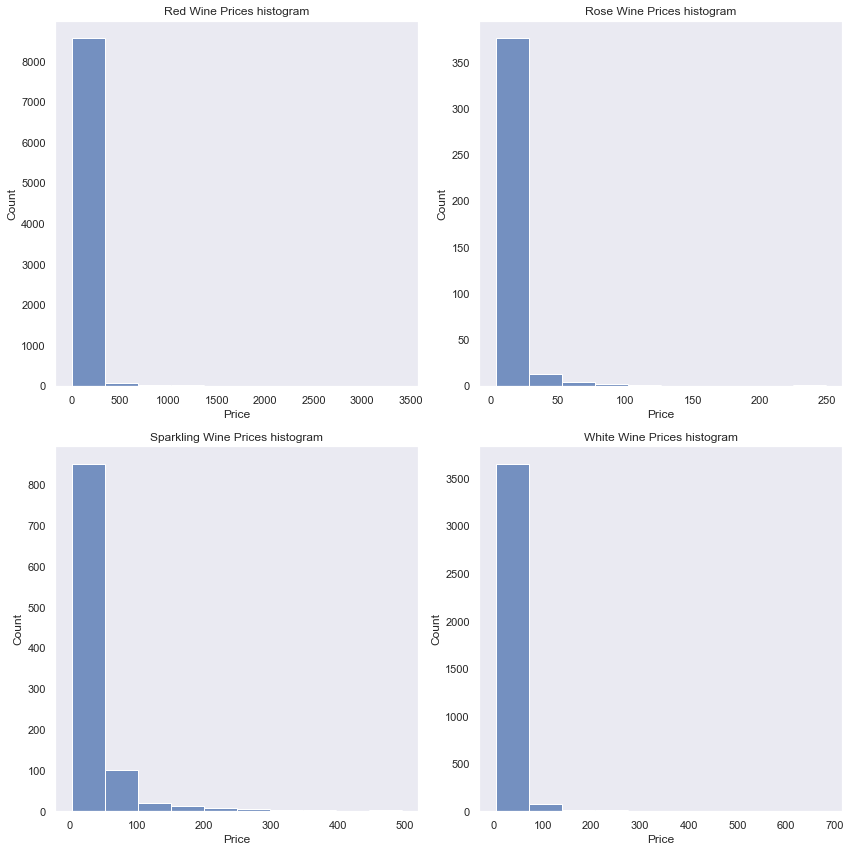

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Histogram of prices
fig = plt.figure(figsize=(12, 12))
titles = ['Red', 'Rose', 'Sparkling', 'White']

for i in range(1,5):
    plt.subplot(2,2,i)
    sns.histplot(x = dfs[i-1]['Price'], bins=10)
    plt.grid()
    plt.title(titles[i-1] + " Wine Prices histogram")
    
fig.tight_layout()
plt.show()

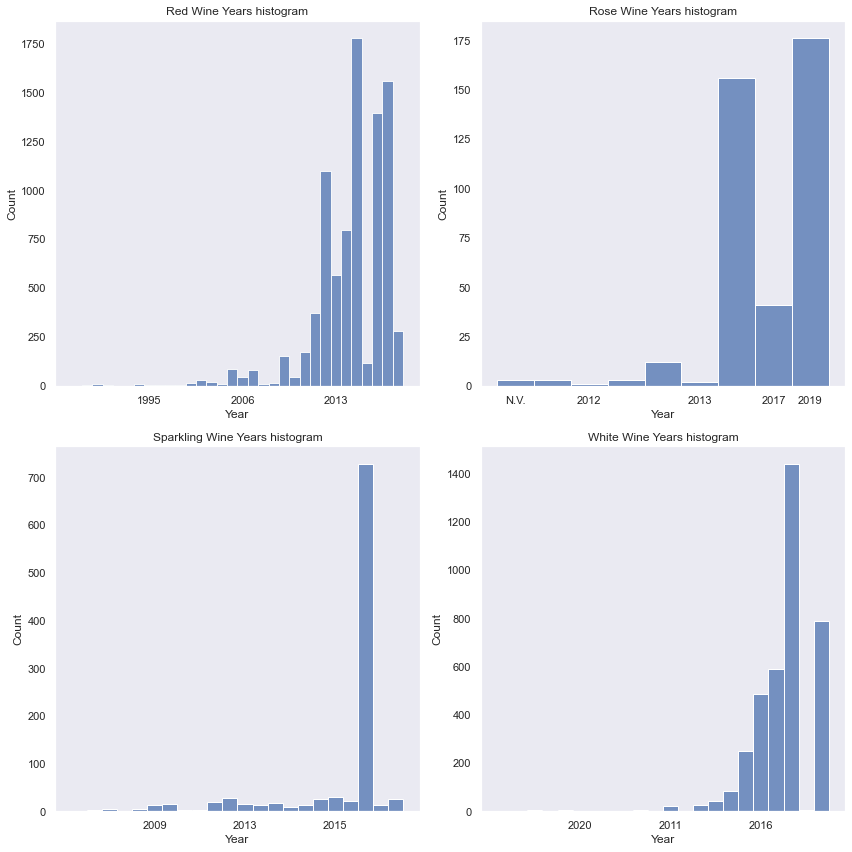

In [8]:
# Histogram by Years
fig = plt.figure(figsize=(12,12))
titles = ['Red', 'Rose', 'Sparkling', 'White']

for i in range(1,5):
    plt.subplot(2,2,i)
    sns.histplot(x = dfs[i-1]['Year'], binwidth=2.0)
    plt.grid()

    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, 5, dtype=int)
    ax.set_xticks(custom_ticks)

    plt.gca().invert_xaxis()

    plt.title(titles[i-1] + " Wine Years histogram")
    
fig.tight_layout()
plt.show()

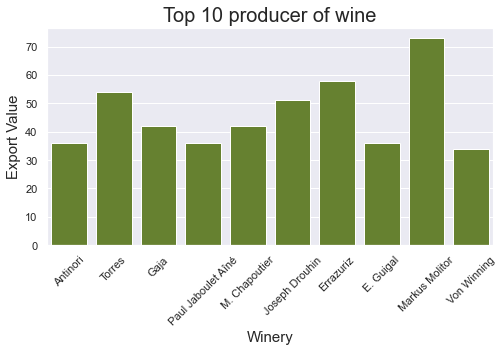

In [9]:
# Top 10 producers of wine
top_wineries =  wine_data.Winery.value_counts()[:10]
plt.figure(figsize=(8,4))
graph = sns.countplot(x = 'Winery', data = wine_data[wine_data.Winery.isin(top_wineries.index.values)], color = 'olivedrab')
graph.set_title("Top 10 producer of wine", fontsize=20)
graph.set_xlabel("Winery", fontsize=15)
graph.set_ylabel("Export Value", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

plt.show()

<AxesSubplot:>

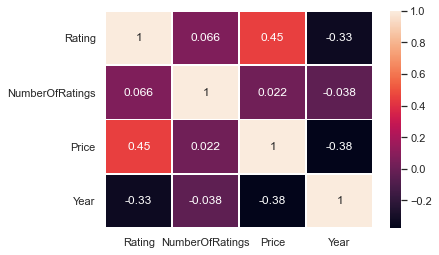

In [10]:
# Correlation between numerical data

corrs = wine_data.corr()       
sns.heatmap(corrs,annot = True,linewidths=.6)

<b>Part IV. Machine Learning</b>

We will try to predict price of wine considering other attributes by using Random Forest Regressor.
1. We predicted price of wine using Random Forest
2. We predicted rating of wine using Random Forest

Below of each cell, you can see residual plots, and Mean Absolute Error. 
<b>After trying several models, we've come to conclusion that Random Forest is the best model. </b>

MAE of test set: 10.62244270569811
STD of residuals: 37.63276309637799


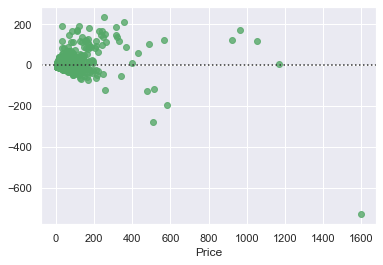

In [11]:
#PREDICT PRICE
#RandomForest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import statistics

X = wine_data[['Country', 'Rating', 'NumberOfRatings','Winery', 'Year', 'Type']]
X = pd.get_dummies(data=X, drop_first=True)
y = wine_data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train, Y_train)
preds = model.predict(X_test)

print(f'MAE of test set: {mean_absolute_error(Y_test, preds)}')
print(f'STD of residuals: {statistics.stdev(Y_test-preds)}')
sns.residplot(x=Y_test, y=preds, color='g')
plt.show()

MAE of test set: 0.14703024334417536
STD of residuals: 0.18922995410182816


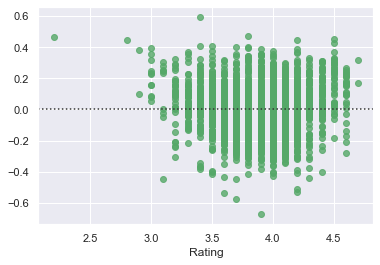

In [12]:
#PREDICT RATING
#RandomForest model
X = wine_data[['Country', 'Price', 'NumberOfRatings',  'Type',  'Winery']]
X = pd.get_dummies(data=X, drop_first=True)
y = wine_data['Rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train, Y_train)
preds = model.predict(X_test)

print(f'MAE of test set: {mean_absolute_error(Y_test, preds)}')
print(f'STD of residuals: {statistics.stdev(Y_test-preds)}')
sns.residplot(x=Y_test, y=preds, color='g', line_kws={"color": "red"})
plt.show()